## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
#1.請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
model1 = build_mlp()
model1.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""
Compile 模型
"""
optimizer = keras.optimizers.Adam(lr=0.001)
model1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [9]:
"""
設定要訓練的 Epoch 數
"""
model1.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 18s 366us/step - loss: 1.9306 - acc: 0.3037 - val_loss: 1.7655 - val_acc: 0.3777
Epoch 2/500
50000/50000 [==============================] - 16s 315us/step - loss: 1.7130 - acc: 0.3875 - val_loss: 1.6938 - val_acc: 0.3926
Epoch 3/500
50000/50000 [==============================] - 16s 317us/step - loss: 1.6255 - acc: 0.4222 - val_loss: 1.5694 - val_acc: 0.4426
Epoch 4/500
50000/50000 [==============================] - 16s 311us/step - loss: 1.5622 - acc: 0.4435 - val_loss: 1.5735 - val_acc: 0.4297
Epoch 5/500
50000/50000 [==============================] - 15s 296us/step - loss: 1.5091 - acc: 0.4639 - val_loss: 1.5057 - val_acc: 0.4671
Epoch 6/500
50000/50000 [==============================] - 15s 301us/step - loss: 1.4704 - acc: 0.4759 - val_loss: 1.5003 - val_acc: 0.4653
Epoch 7/500
50000/50000 [==============================] - 16s

Epoch 57/500
50000/50000 [==============================] - 14s 288us/step - loss: 0.5400 - acc: 0.8064 - val_loss: 1.9764 - val_acc: 0.5208
Epoch 58/500
50000/50000 [==============================] - 15s 306us/step - loss: 0.5371 - acc: 0.8086 - val_loss: 2.0511 - val_acc: 0.5135
Epoch 59/500
50000/50000 [==============================] - 15s 298us/step - loss: 0.5280 - acc: 0.8122 - val_loss: 2.1002 - val_acc: 0.5136
Epoch 60/500
50000/50000 [==============================] - 14s 289us/step - loss: 0.5152 - acc: 0.8162 - val_loss: 2.0932 - val_acc: 0.5097
Epoch 61/500
50000/50000 [==============================] - 15s 301us/step - loss: 0.5186 - acc: 0.8153 - val_loss: 2.1245 - val_acc: 0.5099
Epoch 62/500
50000/50000 [==============================] - 15s 297us/step - loss: 0.4881 - acc: 0.8278 - val_loss: 2.1464 - val_acc: 0.5108
Epoch 63/500
50000/50000 [==============================] - 15s 307us/step - loss: 0.4888 - acc: 0.8256 - val_loss: 2.2838 - val_acc: 0.5027
Epoch 64/500


Epoch 115/500
50000/50000 [==============================] - 13s 262us/step - loss: 0.2359 - acc: 0.9154 - val_loss: 3.4474 - val_acc: 0.49830s - los - ETA: 8s - loss: 0.2394  - ETA: 7s - loss - ETA: 6s - loss: 0.2351 - acc: 0.91 - ETA:  - ETA: 4 - ETA: 2s - loss: 0.2387 - ac - ETA: 2s - loss: 0.2395 - acc - ETA: 1s -
Epoch 116/500
50000/50000 [==============================] - 13s 261us/step - loss: 0.2232 - acc: 0.9218 - val_loss: 3.4779 - val_acc: 0.5024 - ETA: 5s - loss: 0.2110 -  - ETA: 4s - loss: 0.2123 - acc: 0 - ETA: 4s - loss: 0.2118 - acc:  - ETA: 4s - loss: 0.2125 - acc: 0.92 - ETA: 3s - lo
Epoch 117/500
50000/50000 [==============================] - 13s 261us/step - loss: 0.2513 - acc: 0.9110 - val_loss: 3.4209 - val_acc: 0.496930 - acc: 0 - ETA: 7s - loss: 0.2225 - acc: 0.922 -  - ETA: 5s - loss: 0.2356 - ac - ETA: 4s - loss: 0.23 - ETA: 3s - loss: 0.2409 - acc - ETA: 3s - loss: 0.2
Epoch 118/500
50000/50000 [==============================] - 14s 275us/step - loss: 0.2662 

50000/50000 [==============================] - 15s 294us/step - loss: 0.2154 - acc: 0.9250 - val_loss: 4.0921 - val_acc: 0.4870
Epoch 170/500
50000/50000 [==============================] - 15s 295us/step - loss: 0.2329 - acc: 0.9182 - val_loss: 4.1230 - val_acc: 0.4911
Epoch 171/500
50000/50000 [==============================] - 15s 296us/step - loss: 0.1525 - acc: 0.9466 - val_loss: 4.1165 - val_acc: 0.5004
Epoch 172/500
50000/50000 [==============================] - 15s 305us/step - loss: 0.1091 - acc: 0.9621 - val_loss: 4.2310 - val_acc: 0.5011
Epoch 173/500
50000/50000 [==============================] - 15s 302us/step - loss: 0.1312 - acc: 0.9535 - val_loss: 4.2105 - val_acc: 0.4926
Epoch 174/500
50000/50000 [==============================] - 15s 300us/step - loss: 0.1614 - acc: 0.9424 - val_loss: 4.2748 - val_acc: 0.4906
Epoch 175/500
50000/50000 [==============================] - 15s 304us/step - loss: 0.1464 - acc: 0.9490 - val_loss: 4.2029 - val_acc: 0.4950
Epoch 176/500
50000/

50000/50000 [==============================] - 16s 314us/step - loss: 0.1661 - acc: 0.9431 - val_loss: 4.4793 - val_acc: 0.4954
Epoch 227/500
50000/50000 [==============================] - 16s 311us/step - loss: 0.0838 - acc: 0.9707 - val_loss: 4.6008 - val_acc: 0.4943
Epoch 228/500
50000/50000 [==============================] - 16s 324us/step - loss: 0.1208 - acc: 0.9593 - val_loss: 4.5593 - val_acc: 0.4948
Epoch 229/500
50000/50000 [==============================] - 15s 301us/step - loss: 0.1693 - acc: 0.9431 - val_loss: 4.6447 - val_acc: 0.4914
Epoch 230/500
50000/50000 [==============================] - 15s 309us/step - loss: 0.1907 - acc: 0.9363 - val_loss: 4.5998 - val_acc: 0.4913
Epoch 231/500
50000/50000 [==============================] - 15s 301us/step - loss: 0.1064 - acc: 0.9639 - val_loss: 4.5693 - val_acc: 0.4960
Epoch 232/500
50000/50000 [==============================] - 15s 293us/step - loss: 0.1094 - acc: 0.9617 - val_loss: 4.5200 - val_acc: 0.4979
Epoch 233/500
50000/

Epoch 284/500
50000/50000 [==============================] - 14s 279us/step - loss: 0.1907 - acc: 0.9383 - val_loss: 4.8050 - val_acc: 0.4908
Epoch 285/500
50000/50000 [==============================] - 14s 285us/step - loss: 0.0847 - acc: 0.9717 - val_loss: 4.7467 - val_acc: 0.4992
Epoch 286/500
50000/50000 [==============================] - 14s 281us/step - loss: 0.0641 - acc: 0.9778 - val_loss: 4.7548 - val_acc: 0.5013
Epoch 287/500
50000/50000 [==============================] - 14s 279us/step - loss: 0.0324 - acc: 0.9902 - val_loss: 4.7739 - val_acc: 0.5004
Epoch 288/500
50000/50000 [==============================] - 14s 283us/step - loss: 0.0253 - acc: 0.9926 - val_loss: 4.8159 - val_acc: 0.4993
Epoch 289/500
50000/50000 [==============================] - 14s 285us/step - loss: 0.0858 - acc: 0.9722 - val_loss: 4.9729 - val_acc: 0.4866
Epoch 290/500
50000/50000 [==============================] - 14s 280us/step - loss: 0.3422 - acc: 0.9032 - val_loss: 4.8676 - val_acc: 0.4820
Epoch 

50000/50000 [==============================] - 14s 279us/step - loss: 0.0570 - acc: 0.9798 - val_loss: 5.0298 - val_acc: 0.4946
Epoch 342/500
50000/50000 [==============================] - 14s 288us/step - loss: 0.0254 - acc: 0.9922 - val_loss: 4.9765 - val_acc: 0.4996
Epoch 343/500
50000/50000 [==============================] - 14s 275us/step - loss: 0.0251 - acc: 0.9925 - val_loss: 5.0794 - val_acc: 0.4954
Epoch 344/500
50000/50000 [==============================] - 14s 289us/step - loss: 0.1710 - acc: 0.9498 - val_loss: 5.2465 - val_acc: 0.4764
Epoch 345/500
50000/50000 [==============================] - 14s 289us/step - loss: 0.2798 - acc: 0.9196 - val_loss: 4.9058 - val_acc: 0.4875
Epoch 346/500
50000/50000 [==============================] - 15s 300us/step - loss: 0.0786 - acc: 0.9731 - val_loss: 4.9658 - val_acc: 0.4948
Epoch 347/500
50000/50000 [==============================] - 15s 294us/step - loss: 0.0320 - acc: 0.9899 - val_loss: 4.9711 - val_acc: 0.4948
Epoch 348/500
50000/

50000/50000 [==============================] - 15s 294us/step - loss: 0.0510 - acc: 0.9827 - val_loss: 5.0772 - val_acc: 0.5057
Epoch 399/500
50000/50000 [==============================] - 14s 285us/step - loss: 0.0902 - acc: 0.9700 - val_loss: 5.2577 - val_acc: 0.4871
Epoch 400/500
50000/50000 [==============================] - 14s 286us/step - loss: 0.1649 - acc: 0.9499 - val_loss: 5.2382 - val_acc: 0.4854
Epoch 401/500
50000/50000 [==============================] - 15s 297us/step - loss: 0.1237 - acc: 0.9611 - val_loss: 5.0620 - val_acc: 0.4944
Epoch 402/500
50000/50000 [==============================] - 14s 290us/step - loss: 0.0323 - acc: 0.9893 - val_loss: 5.0792 - val_acc: 0.4975
Epoch 403/500
50000/50000 [==============================] - 14s 284us/step - loss: 0.0134 - acc: 0.9964 - val_loss: 5.1440 - val_acc: 0.4935
Epoch 404/500
50000/50000 [==============================] - 15s 290us/step - loss: 0.0089 - acc: 0.9981 - val_loss: 5.1403 - val_acc: 0.4990
Epoch 405/500
50000/

Epoch 456/500
50000/50000 [==============================] - 13s 269us/step - loss: 0.0334 - acc: 0.9889 - val_loss: 5.0128 - val_acc: 0.4968
Epoch 457/500
50000/50000 [==============================] - 14s 275us/step - loss: 0.0154 - acc: 0.9960 - val_loss: 5.0357 - val_acc: 0.5027
Epoch 458/500
50000/50000 [==============================] - 14s 271us/step - loss: 0.0080 - acc: 0.9986 - val_loss: 5.0349 - val_acc: 0.5038
Epoch 459/500
50000/50000 [==============================] - 15s 291us/step - loss: 0.0041 - acc: 0.9997 - val_loss: 5.0532 - val_acc: 0.5061
Epoch 460/500
50000/50000 [==============================] - 14s 283us/step - loss: 0.0034 - acc: 0.9998 - val_loss: 5.0758 - val_acc: 0.5062
Epoch 461/500
50000/50000 [==============================] - 14s 287us/step - loss: 0.0033 - acc: 0.9998 - val_loss: 5.0841 - val_acc: 0.5043
Epoch 462/500
50000/50000 [==============================] - 14s 288us/step - loss: 0.0074 - acc: 0.9985 - val_loss: 5.2295 - val_acc: 0.4952
Epoch 

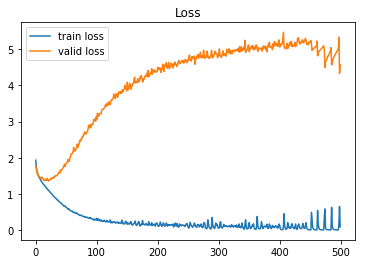

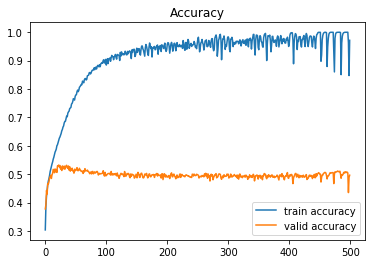

In [13]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model1.history.history["loss"]
valid_loss = model1.history.history["val_loss"]

train_acc = model1.history.history["acc"]
valid_acc = model1.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [14]:
#2.請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢
model2 = build_mlp()
model2.summary()

sgd = keras.optimizers.SGD(lr=0.001)
model2.compile(loss="mean_squared_error", metrics=["accuracy"], optimizer=sgd)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [15]:
model2.fit(x_train, y_train,
           epochs=100,
           batch_size=256,
           validation_data=(x_test, y_test),
           shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 12s 239us/step - loss: 0.0914 - acc: 0.1074 - val_loss: 0.0912 - val_acc: 0.1099
Epoch 2/100
50000/50000 [==============================] - 11s 225us/step - loss: 0.0911 - acc: 0.1093 - val_loss: 0.0910 - val_acc: 0.1126
Epoch 3/100
50000/50000 [==============================] - 11s 230us/step - loss: 0.0909 - acc: 0.1115 - val_loss: 0.0908 - val_acc: 0.1125
Epoch 4/100
50000/50000 [==============================] - 11s 227us/step - loss: 0.0908 - acc: 0.1131 - val_loss: 0.0907 - val_acc: 0.1144908 - a
Epoch 5/100
50000/50000 [==============================] - 11s 224us/step - loss: 0.0907 - acc: 0.1141 - val_loss: 0.0906 - val_acc: 0.1167
Epoch 6/100
50000/50000 [==============================] - 11s 219us/step - loss: 0.0906 - acc: 0.1160 - val_loss: 0.0905 - val_acc: 0.1174
Epoch 7/100
50000/50000 [==============================] - 11s 226us/step - loss: 0.0905 - acc: 0.1169 

50000/50000 [==============================] - 13s 252us/step - loss: 0.0883 - acc: 0.2012 - val_loss: 0.0882 - val_acc: 0.2053
Epoch 56/100
50000/50000 [==============================] - 10s 208us/step - loss: 0.0882 - acc: 0.2026 - val_loss: 0.0882 - val_acc: 0.2075
Epoch 57/100
50000/50000 [==============================] - 14s 273us/step - loss: 0.0882 - acc: 0.2045 - val_loss: 0.0882 - val_acc: 0.2089
Epoch 58/100
50000/50000 [==============================] - 11s 227us/step - loss: 0.0882 - acc: 0.2062 - val_loss: 0.0881 - val_acc: 0.2113
Epoch 59/100
50000/50000 [==============================] - 12s 236us/step - loss: 0.0881 - acc: 0.2071 - val_loss: 0.0881 - val_acc: 0.2129s: 0.0881 - acc: 0.20 - ETA:
Epoch 60/100
50000/50000 [==============================] - 12s 250us/step - loss: 0.0881 - acc: 0.2087 - val_loss: 0.0880 - val_acc: 0.2137A: 3s - loss: - ETA: 2s - loss: 0.0881 - acc: 0 - ETA: 1s - - ETA: 0s - loss: 0.0881 - acc: 0.
Epoch 61/100
50000/50000 [===================

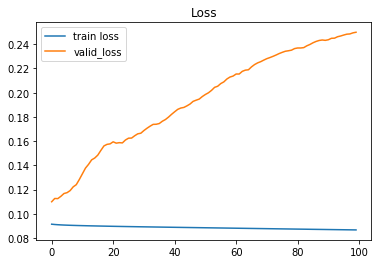

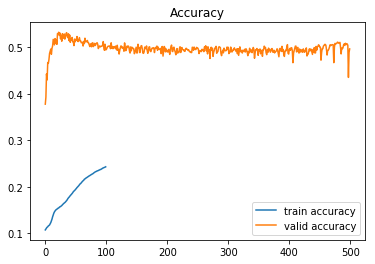

In [17]:
import matplotlib.pyplot as plt
train_loss = model2.history.history["loss"]
valid_loss = model2.history.history["val_loss"]

train_acc = model2.history.history["acc"]
valid_loss = model2.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid_loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()